In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class DiffEqRegularization(tf.keras.layers.Layer):
    def __init__(self, model):
        super(DiffEqRegularization, self).__init__()
        self.model = model
        
    def call(self, x):
        with tf.GradientTape() as hess:
            with tf.GradientTape() as grad:
                hess.watch(x)
                grad.watch(x)
                
                u = self.model(x)
                
            du_dx = grad.gradient(u, x)
            
        d2u_dx2 = hess.gradient(du_dx, x)
                        
        residual = d2u_dx2 - 4 * du_dx - 5 * u
        self.add_loss(tf.reduce_mean(tf.square(residual)))
        tf.print("Residual ", tf.reduce_mean(tf.square(residual)))
        
        return (u, residual)

In [3]:

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape=(1,), activation="sigmoid"),
        tf.keras.layers.Dense(1),
    ]
)

x = tf.keras.layers.Input(shape=(1,))
u, residual = DiffEqRegularization(model)(x)
pinn = tf.keras.Model(inputs=[x], outputs=[u, residual])

pinn.compile(loss=["mse", "mse"], optimizer=tf.keras.optimizers.SGD(learning_rate=0.001))

train_x = np.reshape(np.linspace(0, 1, num=101), (-1, 1))
history = pinn.fit(train_x, epochs=20, verbose=1)

Epoch 1/20
Residual  27.2032738
1/4 [======>.......................] - ETA: 1s - loss: 27.2033 - diff_eq_regularization_loss: 0.0000e+00 - diff_eq_regularization_1_loss: 0.0000e+00Residual  16.7372398
Residual  10.0786276
Residual  7.36723042
4/4 [==============================] - 0s 4ms/step - loss: 15.3466 - diff_eq_regularization_loss: 0.0000e+00 - diff_eq_regularization_1_loss: 0.0000e+00
Epoch 2/20
Residual  2.8480792
1/4 [======>.......................] - ETA: 0s - loss: 2.8481 - diff_eq_regularization_loss: 0.0000e+00 - diff_eq_regularization_1_loss: 0.0000e+00Residual  1.9838841
Residual  1.16852522
Residual  0.575160146
4/4 [==============================] - 0s 4ms/step - loss: 1.6439 - diff_eq_regularization_loss: 0.0000e+00 - diff_eq_regularization_1_loss: 0.0000e+00
Epoch 3/20
Residual  0.469566375
1/4 [======>.......................] - ETA: 0s - loss: 0.4696 - diff_eq_regularization_loss: 0.0000e+00 - diff_eq_regularization_1_loss: 0.0000e+00Residual  0.309490412
Residual 

Text(0, 0.5, 'Loss')

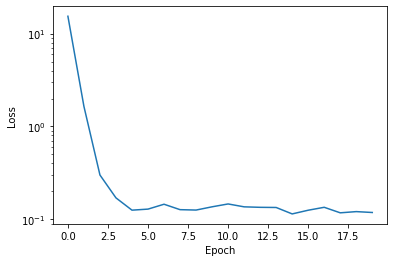

In [4]:
plt.figure()
plt.semilogy(history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [5]:
test_x = np.reshape(np.linspace(0, 1, num=101), (-1, 1))
true_soln = 1.0/6.0 * np.exp(5*test_x) + 5.0/6.0 * np.exp(-test_x)

test_y, _ = pinn.predict(train_x)

Residual  0.200024232
Residual  0.013551061
Residual  0.119591087
Residual  0.281558216


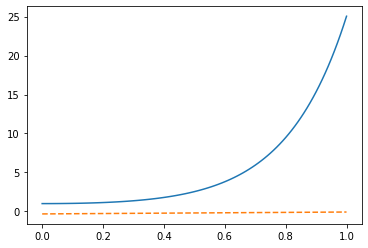

In [6]:
plt.figure()
plt.plot(test_x, true_soln, "-", label="True soln")
plt.plot(test_x, test_y, "--", label="NN approx")

In [7]:
pinn.predict(train_x)

Residual  0.200024232
Residual  0.013551061
Residual  0.119591087
Residual  0.281558216


[array([[-0.3234899 ],
        [-0.32101196],
        [-0.31853372],
        [-0.31605527],
        [-0.31357664],
        [-0.31109786],
        [-0.3086189 ],
        [-0.30613995],
        [-0.30366108],
        [-0.30118215],
        [-0.29870322],
        [-0.29622442],
        [-0.29374576],
        [-0.2912674 ],
        [-0.2887892 ],
        [-0.28631133],
        [-0.28383386],
        [-0.28135657],
        [-0.27887988],
        [-0.27640355],
        [-0.27392772],
        [-0.2714525 ],
        [-0.2689777 ],
        [-0.26650378],
        [-0.2640304 ],
        [-0.26155782],
        [-0.25908586],
        [-0.2566148 ],
        [-0.25414455],
        [-0.25167522],
        [-0.24920684],
        [-0.24673939],
        [-0.244273  ],
        [-0.24180768],
        [-0.23934337],
        [-0.23688024],
        [-0.23441839],
        [-0.2319578 ],
        [-0.2294983 ],
        [-0.22704026],
        [-0.2245835 ],
        [-0.22212821],
        [-0.21967426],
        [-0

In [8]:
pinn.layers[-1].model.input

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_input')>

In [9]:
history.history

{'loss': [15.346592903137207,
  1.6439121961593628,
  0.3006759583950043,
  0.17059898376464844,
  0.12586486339569092,
  0.12918615341186523,
  0.1457776427268982,
  0.1274445652961731,
  0.12618117034435272,
  0.13677044212818146,
  0.14678408205509186,
  0.13666990399360657,
  0.13504549860954285,
  0.1345011591911316,
  0.11468452215194702,
  0.1256701797246933,
  0.13513249158859253,
  0.11784239113330841,
  0.12141600251197815,
  0.11881300806999207],
 'diff_eq_regularization_loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'diff_eq_regularization_1_loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]}

In [10]:

pinn.losses

[<tf.Tensor 'model/diff_eq_regularization/Mean:0' shape=() dtype=float32>]